In [1]:
import pynucastro as pyna

In [2]:
rates = ["p-p-d-ec",
         "d-pg-he3-de04",
         "he3-he3pp-he4-nacr"]

In [3]:
net = pyna.RateCollection(rates)

In [4]:
print(net.network_overview())

p
  consumed by:
     p + p + e‚Åª ‚ü∂ H2 + ùúà
     H2 + p ‚ü∂ He3 + ùõæ
  produced by:
     He3 + He3 ‚ü∂ p + p + He4

d
  consumed by:
     H2 + p ‚ü∂ He3 + ùõæ
  produced by:
     p + p + e‚Åª ‚ü∂ H2 + ùúà

he3
  consumed by:
     He3 + He3 ‚ü∂ p + p + He4
  produced by:
     H2 + p ‚ü∂ He3 + ùõæ

he4
  consumed by:
  produced by:
     He3 + He3 ‚ü∂ p + p + He4




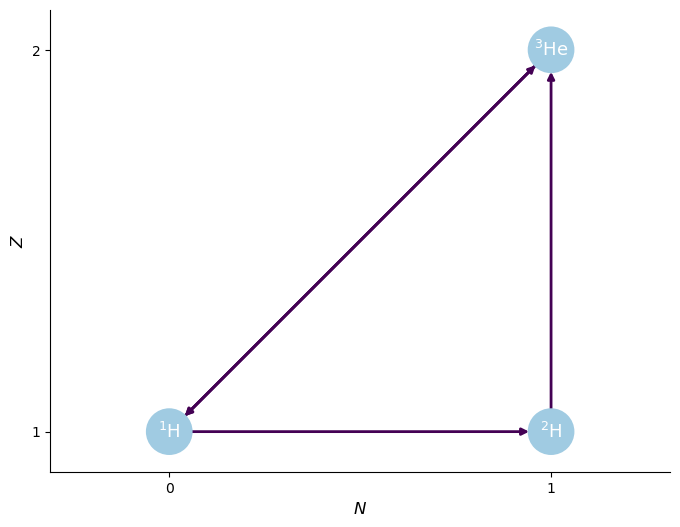

In [5]:
net.plot()

In [6]:
pynet = pyna.PythonNetwork(rates)

In [7]:
pynet.write_network()

import numba
import numpy as np
from numba.experimental import jitclass

from pynucastro.rates import Tfactors
from pynucastro.screening import PlasmaState, ScreenFactors

jp = 0
jd = 1
jhe3 = 2
jhe4 = 3
nnuc = 4

A = np.zeros((nnuc), dtype=np.int32)

A[jp] = 1
A[jd] = 2
A[jhe3] = 3
A[jhe4] = 4

Z = np.zeros((nnuc), dtype=np.int32)

Z[jp] = 1
Z[jd] = 1
Z[jhe3] = 2
Z[jhe4] = 2

names = []
names.append("h1")
names.append("h2")
names.append("he3")
names.append("he4")

@jitclass([
    ("p_p__d__weak__electron_capture", numba.float64),
    ("p_d__he3", numba.float64),
    ("he3_he3__p_p_he4", numba.float64),
])
class RateEval:
    def __init__(self):
        self.p_p__d__weak__electron_capture = np.nan
        self.p_d__he3 = np.nan
        self.he3_he3__p_p_he4 = np.nan

@numba.njit()
def ye(Y):
    return np.sum(Z * Y)/np.sum(A * Y)

@numba.njit()
def p_p__d__weak__electron_capture(rate_eval, tf):
    # p + p --> d
    rate = 0.0

    # bet+w
    rate += np.exp(  -34.7863 + -3.51193*tf.T9